In [1]:
include("_util.jl")
include("_types.jl")
include("intersection.jl")
include("inside.jl")
include("extremal.jl")
include("moving.jl")
import Plots

# Intersection segment to segment

parallel


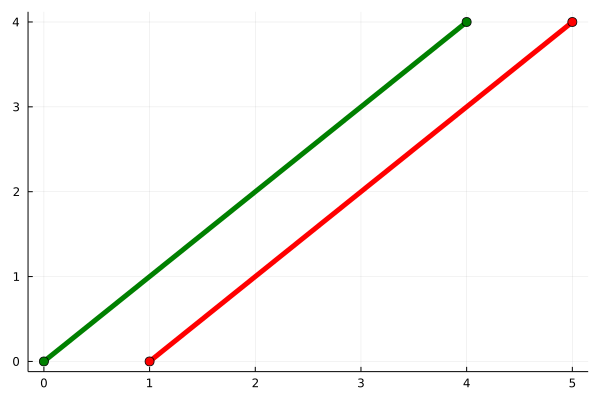

In [2]:
s1 = Segment([0,0],[4,4])
s2 = Segment([1,0],[5,4])
code, inter = find_intersect(s1,s2)
println(code)
if inter != nothing
    plot(Vertex(inter),color=:yellow)
end
plot(s1,color=:green)
plot!(s2,color=:red)

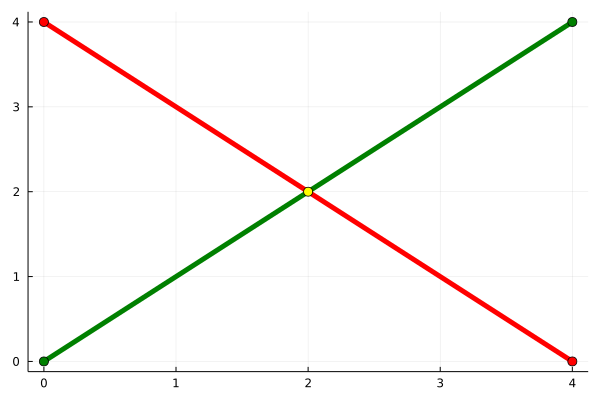

In [3]:
s1 = Segment([0,0],[4,4])
s2 = Segment([0,4],[4,0])
code, inter = find_intersect(s1,s2)
plot(s1,color=:green)
plot!(s2,color=:red)
plot!(Vertex(inter),color=:yellow)

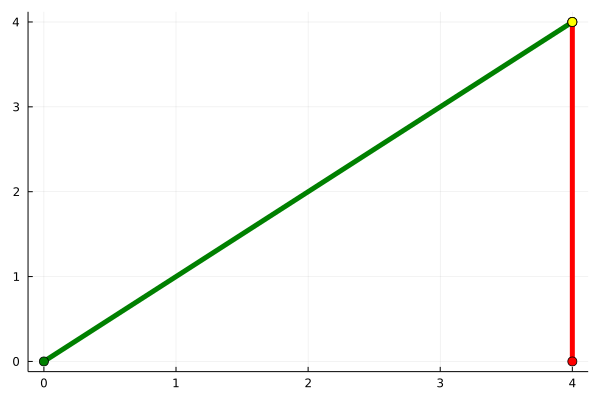

In [4]:
s1 = Segment([0,0],[4,4])
s2 = Segment([4,4],[4,0])
code, inter = find_intersect(s1,s2)
plot(s1,color=:green)
plot!(s2,color=:red)
plot!(Vertex(inter),color=:yellow)

# Polygon intersection

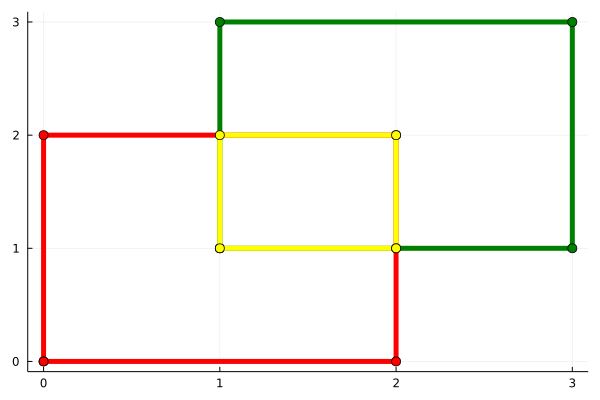

In [5]:
p = Polygon([0,0],[2,0],[2,2],[0,2])
q = Polygon([1,1],[3,1],[3,3],[1,3])
pq = find_intersect(p,q)
plot(p,color=:red)
plot!(q,color=:green)
plot!(pq,color=:yellow)

# Point inside polygon

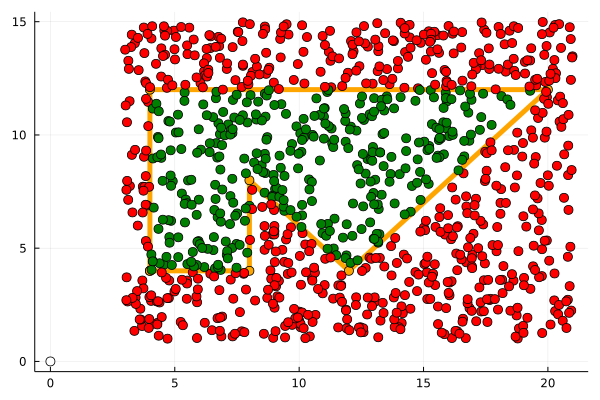

In [6]:
pol = Polygon([4,4],[8,4],[8,8],[12,4],[20,12],[4,12])
plot(pol,color=:orange)
for p in 1:1000
    p = [(rand()*18)+3,(rand()*14)+1]
    code = isinside(p,pol)
    if code == "inside"
        color = :green
    elseif code == "vertex"
        color = :yellow
    elseif code == "edge"
        color = :blue
    elseif code == "outside"
        color = :red
    end
    plot!(Vertex(p),color=color)
end
plot!(Vertex([0,0]),color=:white)

# Extremal in direction

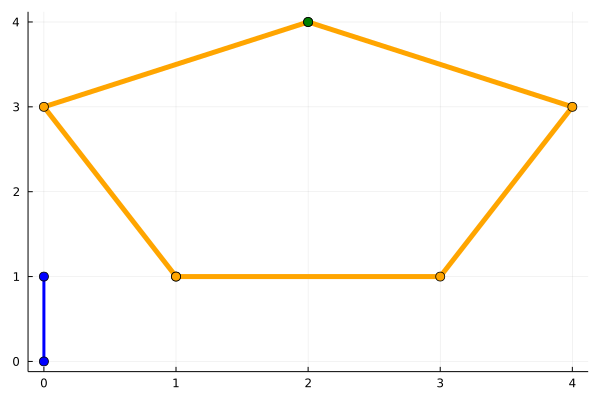

In [7]:
pol = Polygon([1,1],[3,1],[4,3],[2,4],[0,3])
u = [0,1]
x,y = [0,u[1]],[0,u[2]]
ext = Vertex(find_extremal(pol,u))
plot(pol,color=:orange)
Plots.plot!(x,y,marker=(:circle,5,:blue),linecolor=:blue, linewidth=3, legend=false)
plot!(ext,color=:green)

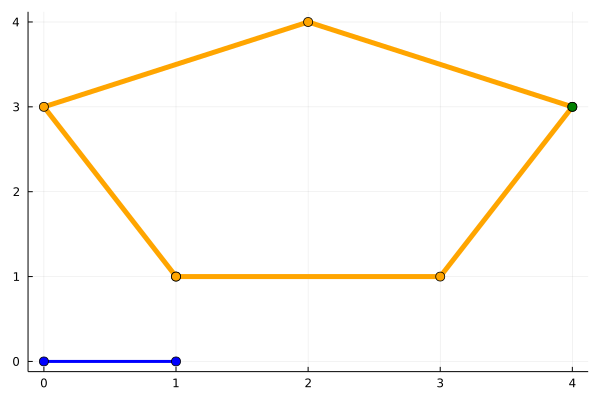

In [8]:
pol = Polygon([1,1],[3,1],[4,3],[2,4],[0,3])
u = [1,0]
x,y = [0,u[1]],[0,u[2]]
ext = Vertex(find_extremal(pol,u))
plot(pol,color=:orange)
Plots.plot!(x,y,marker=(:circle,5,:blue),linecolor=:blue, linewidth=3, legend=false)
plot!(ext,color=:green)

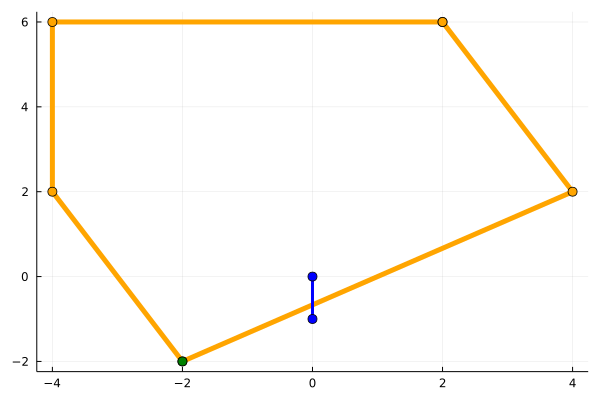

In [9]:
pol = Polygon([2,6],[-4,6],[-4,2],[-2,-2],[4,2])
u = [0,-1]
x,y = [0,u[1]],[0,u[2]]
ext = Vertex(find_extremal(pol,u))
plot(pol,color=:orange)
Plots.plot!(x,y,marker=(:circle,5,:blue),linecolor=:blue, linewidth=3, legend=false)
plot!(ext,color=:green)

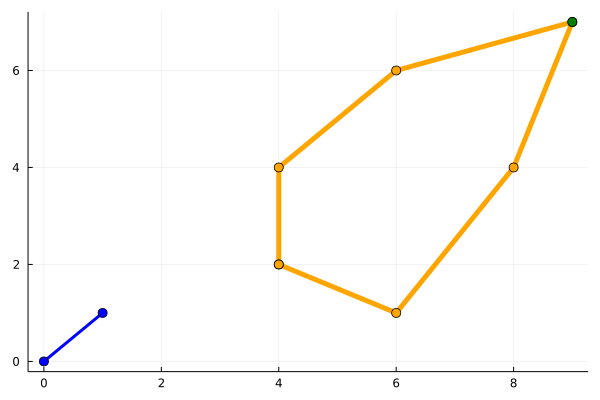

In [10]:
pol = Polygon([4,2],[6,1],[8,4],[9,7],[6,6],[4,4])
u = [1,1]
x,y = [0,u[1]],[0,u[2]]
ext = Vertex(find_extremal(pol,u))
plot(pol,color=:orange)
Plots.plot!(x,y,marker=(:circle,5,:blue),linecolor=:blue, linewidth=3, legend=false)
plot!(ext,color=:green)

# Shortest single vertex

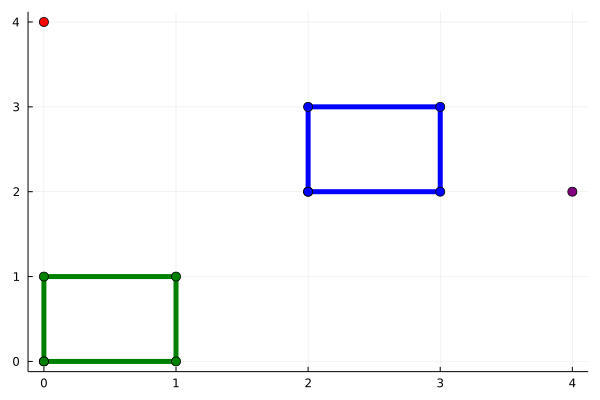

In [11]:
p1 = Polygon([0,0],[1,0],[1,1],[0,1])
p2 = Polygon([2,2],[3,2],[3,3],[2,3])
origin = Vertex([0,4])
dest = Vertex([4,2])
visg = get_visibility_graph(origin,dest,[p1,p2])
plot(p1,color=:green)
plot!(p2,color=:blue)
plot!(origin,color=:red)
plot!(dest,color=:purple)

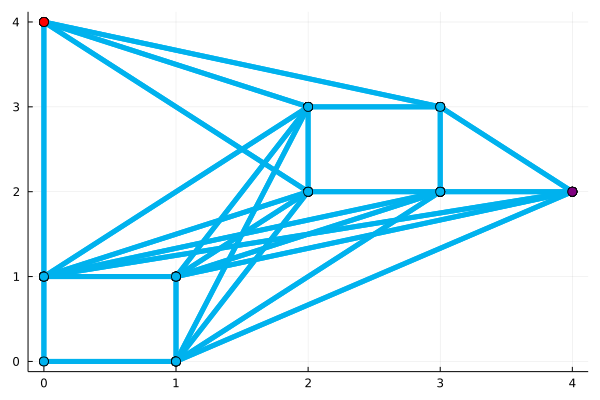

In [12]:
plot(visg,color=:deepskyblue2)
plot!(origin,color=:red)
plot!(dest,color=:purple)

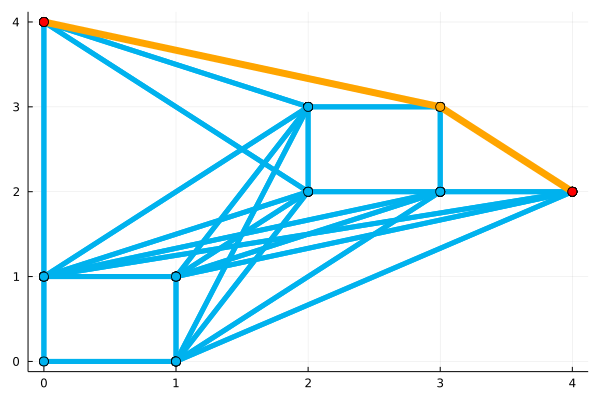

In [13]:
path = dijkstra(visg,origin,dest)
x,y = [v[1] for v in path],[v[2] for v in path]
plot(visg,color=:deepskyblue2)
Plots.plot!(x,y,marker=(:circle,5,:orange),linecolor=:orange, linewidth=7, legend=false)
plot!(origin,color=:red)
plot!(dest,color=:red)

# Moving Polygon

In [14]:
p0 = Polygon([0,0],[1,0],[2,1],[1,3],[0,1])
p1 = Polygon(-[0,0],-[1,0],-[2,1],-[1,3],-[0,1])

obs1 = Polygon([2,8],[6,2],[8,6])
obs2 = Polygon([15,10],[10,0],[20,5])
obs3 = Polygon([10,15],[25,15],[5,20])

origin = Vertex([0,0])
dest = Vertex([25,8])
obs = [obs1,obs2,obs3]

colors = [:orange,:green,:blue]

plot(p0,color=:red)
for (o,h,c) in zip(obs,obs_hulls,colors)
    plot!(o,color=c)
end
plot!(dest,color=:purple)

LoadError: UndefVarError: obs_hulls not defined

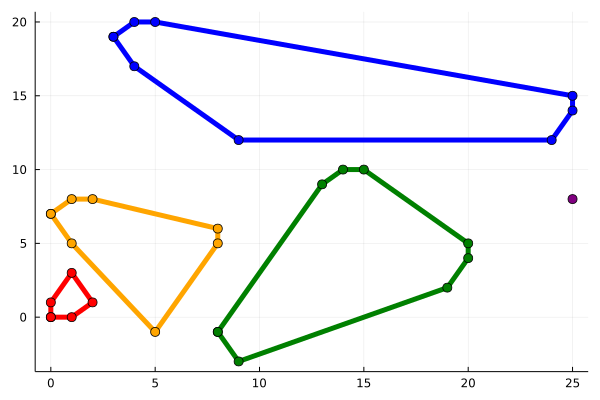

In [15]:
obs_hulls = [minkowski_sum(o,p1) for o in obs]
plot(p0,color=:red)
for (h,c) in zip(obs_hulls,colors)
    plot!(h,color=c)
end
plot!(dest,color=:purple)

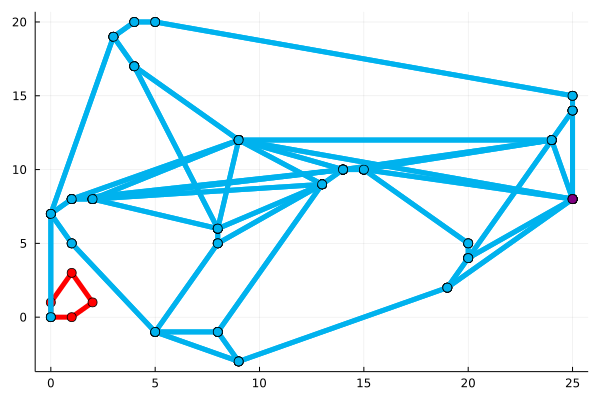

In [16]:
visg = get_visibility_graph(origin,dest,obs_hulls)
plot(p0,color=:red)
plot!(visg,color=:deepskyblue2)
plot!(dest,color=:purple)

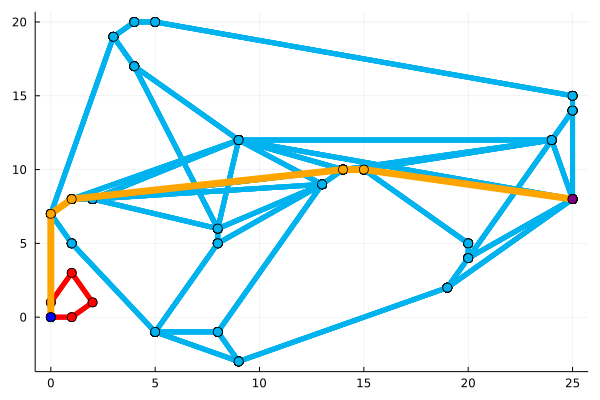

In [17]:
path = dijkstra(visg,origin,dest)
x,y = [v[1] for v in path],[v[2] for v in path]
plot!(p0,color=:red)
plot!(visg,color=:deepskyblue2)
Plots.plot!(x,y,marker=(:circle,5,:orange),linecolor=:orange, linewidth=7, legend=false)
plot!(origin,color=:blue)
plot!(dest,color=:purple)